# Preprocessing RoadTrafficAccidents

In [1]:
import pandas as pd
import os
import datetime
import math
import numpy as np

Getting the full path to the dataset folder

In [2]:
dir_path = os.path.dirname(os.path.realpath("__file__"))
path_to_datasets_folder = os.path.join(dir_path, "datasets")
path_to_accidents_file = os.path.join(path_to_datasets_folder, "RoadTrafficAccidentLocations.csv")

Reading the TrafficAccident file and remove all language duplicates

In [3]:
df_accidents = pd.read_csv(path_to_accidents_file)
df_accidents = df_accidents.drop(columns=['AccidentType_de', 'AccidentType_fr', 'AccidentType_it'])
df_accidents = df_accidents.drop(columns=['AccidentSeverityCategory_de', 'AccidentSeverityCategory_fr', 'AccidentSeverityCategory_it'])
df_accidents = df_accidents.drop(columns=['RoadType_de', 'RoadType_fr', 'RoadType_it'])
df_accidents = df_accidents.drop(columns=['AccidentMonth_de', 'AccidentMonth_fr','AccidentMonth_it'])
df_accidents = df_accidents.drop(columns=['AccidentWeekDay_de', 'AccidentWeekDay_fr', 'AccidentWeekDay_it'])
df_accidents.head()

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,...,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,A2D2677533867004E0430A865E337004,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,...,1245194,ZH,261,2011,1,January,aw406,Saturday,0.0,00h-01h
1,9FD6441F802C20A6E0430A865E3320A6,at0,Accident with skidding or self-accident,as3,Accident with light injuries,False,True,False,rt433,Minor road,...,1246980,ZH,261,2011,1,January,aw406,Saturday,1.0,01h-02h
2,9FDA0DC4856A6094E0430A865E336094,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt439,Other,...,1247749,ZH,261,2011,1,January,aw406,Saturday,2.0,02h-03h
3,A3B66E42396E6000E0430A865E336000,at5,Accident when crossing the lane(s),as3,Accident with light injuries,False,False,False,rt433,Minor road,...,1247102,ZH,261,2011,1,January,aw406,Saturday,2.0,02h-03h
4,9FDA0DBE8CCE9096E0430A865E339096,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,...,1250690,ZH,261,2011,1,January,aw406,Saturday,3.0,03h-04h


create the correct datetime for each row and add 'nan' as value in the date row if the accident hour is missing (rows cases)

In [4]:
df_accidents.head().shape #dims of cleaned dataset

(5, 21)

In [5]:
df_accidents.dtypes #might think about one hot encoding for categ columns, which appear to be the 'object' columns

AccidentUID                     object
AccidentType                    object
AccidentType_en                 object
AccidentSeverityCategory        object
AccidentSeverityCategory_en     object
AccidentInvolvingPedestrian       bool
AccidentInvolvingBicycle          bool
AccidentInvolvingMotorcycle       bool
RoadType                        object
RoadType_en                     object
AccidentLocation_CHLV95_E        int64
AccidentLocation_CHLV95_N        int64
CantonCode                      object
MunicipalityCode                 int64
AccidentYear                     int64
AccidentMonth                    int64
AccidentMonth_en                object
AccidentWeekDay                 object
AccidentWeekDay_en              object
AccidentHour                   float64
AccidentHour_text               object
dtype: object

In [6]:
from collections import Counter

#count NaNs in dataset:
for i in df_accidents.columns:
    print(Counter(list(df_accidents[i].isna()))[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0


In [7]:
#one way of checking positions of NaNs in dataset and get corresponding columns:
nan_positions = [(row, index) for index, row in df_accidents.iterrows() if row.isnull().any()]
nan_positions

[(AccidentUID                           B74241C848E101A8E0430A83942701A8
  AccidentType                                                       at0
  AccidentType_en                Accident with skidding or self-accident
  AccidentSeverityCategory                                           as4
  AccidentSeverityCategory_en              Accident with property damage
  AccidentInvolvingPedestrian                                      False
  AccidentInvolvingBicycle                                         False
  AccidentInvolvingMotorcycle                                      False
  RoadType                                                         rt430
  RoadType_en                                                   Motorway
  AccidentLocation_CHLV95_E                                      2681888
  AccidentLocation_CHLV95_N                                      1246482
  CantonCode                                                          ZH
  MunicipalityCode                                 

In [8]:
#another way of checking positions of NaNs in dataset and get corresponding columns:
idx, idy = np.where(pd.isnull(df_accidents))
idx, df_accidents.columns[idy]

(array([3149, 5749, 7436, 8193], dtype=int64),
 Index(['AccidentHour', 'AccidentHour', 'AccidentHour', 'AccidentHour'], dtype='object'))

In [34]:
months_number = []
for i in months:
    months_number.append(calendar.month_name[i])


In [35]:
months_number

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [50]:
#counting entries in every year's months:

years = np.arange(2011,2021,1).tolist()
months = np.arange(1,13,1).tolist()

for j in years:
    
    dict_ = {}
    
    for i in months:
        row_dim = df_accidents[(df_accidents['AccidentYear'] == j) & (df_accidents['AccidentMonth'] == i)].shape[0]
        months_name = calendar.month_name[i]
        dict_[months_name[:3]] = row_dim
        
    print('{}:'.format(j), dict_)
    print('')
    

2011: {'Jan': 274, 'Feb': 221, 'Mar': 288, 'Apr': 324, 'May': 360, 'Jun': 310, 'Jul': 290, 'Aug': 343, 'Sep': 332, 'Oct': 324, 'Nov': 305, 'Dec': 319}

2012: {'Jan': 269, 'Feb': 239, 'Mar': 340, 'Apr': 290, 'May': 306, 'Jun': 309, 'Jul': 307, 'Aug': 305, 'Sep': 280, 'Oct': 289, 'Nov': 322, 'Dec': 279}

2013: {'Jan': 242, 'Feb': 227, 'Mar': 299, 'Apr': 305, 'May': 332, 'Jun': 372, 'Jul': 337, 'Aug': 323, 'Sep': 299, 'Oct': 328, 'Nov': 314, 'Dec': 267}

2014: {'Jan': 247, 'Feb': 260, 'Mar': 321, 'Apr': 301, 'May': 311, 'Jun': 388, 'Jul': 294, 'Aug': 299, 'Sep': 301, 'Oct': 313, 'Nov': 252, 'Dec': 263}

2015: {'Jan': 249, 'Feb': 246, 'Mar': 298, 'Apr': 288, 'May': 324, 'Jun': 356, 'Jul': 550, 'Aug': 491, 'Sep': 512, 'Oct': 511, 'Nov': 519, 'Dec': 447}

2016: {'Jan': 450, 'Feb': 396, 'Mar': 420, 'Apr': 514, 'May': 549, 'Jun': 554, 'Jul': 478, 'Aug': 504, 'Sep': 546, 'Oct': 515, 'Nov': 480, 'Dec': 412}

2017: {'Jan': 411, 'Feb': 398, 'Mar': 543, 'Apr': 457, 'May': 547, 'Jun': 536, 'Jul': 49

In [51]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

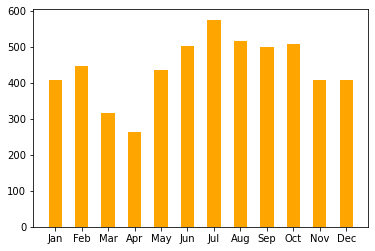

In [52]:
plt.bar(dict_.keys(), dict_.values(), width = 0.5, color='orange')

- Count days in every year's month... This is needed to check whether we have data for every day of each year in order to pin down the exact date:


In [10]:
from itertools import groupby

#count number of distinct days in each month for every year:
for j in years:
    
    days_per_month = []
    
    for i in months:
        z = pd.Series(zip([[len([v]), k] for k, v in groupby(df_accidents[(df_accidents['AccidentYear'] == j) & (df_accidents['AccidentMonth'] == i)]['AccidentWeekDay'])]))
        item_counts = z.index.value_counts(normalize=False)
        days_per_month.append(item_counts.sum())
        
    print('{}:'.format(j), days_per_month)

2011: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2012: [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2013: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2014: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2015: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2016: [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2017: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2018: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2019: [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
2020: [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


In [11]:
first_day = 0
day_multiplier = 0
start = 0
prev_days = ('aw402', 'aw403', 'aw404', 'aw405', 'aw406', 'aw407')

for i, row in df_accidents.iterrows():
    
    # Set the reducer variable according to which day the current month starts with
    # This is done so that in the if, elif loops below to get the correct day for
    # every month
    
    reducer = datetime.date(row['AccidentYear'], row['AccidentMonth'], 1).weekday()
    
    # increase the day multiplier if the a "higher" Weekday is followed by a "lower" weekday
    # example Saturday is followed by a thursday, in this case it is inferred that the next 
    # week has started
    
    if start > 0:
        if int(df_accidents.at[i-1, 'AccidentWeekDay'][-1]) > int(df_accidents.at[i, 'AccidentWeekDay'][-1]):
            day_multiplier += 1
            
        # reset the day_multiplier if a new month starts
        
        if df_accidents.at[i-1, 'AccidentMonth'] != df_accidents.at[i, 'AccidentMonth']:
            day_multiplier = 0
        
        
    
    if row['AccidentWeekDay'] == 'aw401':
        df_accidents.at[i, 'day'] = 1 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw402':
        df_accidents.at[i, 'day'] = 2 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw403':
        df_accidents.at[i, 'day'] = 3 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw404':
        df_accidents.at[i, 'day'] = 4 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw405':
        df_accidents.at[i, 'day'] = 5 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw406':
        df_accidents.at[i, 'day'] = 6 + 7 * day_multiplier - reducer
    elif row['AccidentWeekDay'] == 'aw407':
        df_accidents.at[i, 'day'] = 7 + 7 * day_multiplier - reducer
    
    # safe null values in Accident hour as 'nan' in date column
    if math.isnan(df_accidents.at[i, 'AccidentHour']):
        accident_date = df_accidents.at[i, 'AccidentHour']
        print(df_accidents.at[i, 'AccidentHour'])
        
    # convert to datetime format all time with :30
    else:
        accident_date = datetime.datetime(row['AccidentYear'], row['AccidentMonth'], int(df_accidents.at[i, 'day']), int(df_accidents.at[i, 'AccidentHour']), 30)

    df_accidents.at[i, 'date'] = accident_date
    
    start = 1

nan
nan
nan
nan


In [12]:
df_accidents

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,...,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text,day,date
0,A2D2677533867004E0430A865E337004,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,...,261,2011,1,January,aw406,Saturday,0.0,00h-01h,1.0,2011-01-01 00:30:00
1,9FD6441F802C20A6E0430A865E3320A6,at0,Accident with skidding or self-accident,as3,Accident with light injuries,False,True,False,rt433,Minor road,...,261,2011,1,January,aw406,Saturday,1.0,01h-02h,1.0,2011-01-01 01:30:00
2,9FDA0DC4856A6094E0430A865E336094,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt439,Other,...,261,2011,1,January,aw406,Saturday,2.0,02h-03h,1.0,2011-01-01 02:30:00
3,A3B66E42396E6000E0430A865E336000,at5,Accident when crossing the lane(s),as3,Accident with light injuries,False,False,False,rt433,Minor road,...,261,2011,1,January,aw406,Saturday,2.0,02h-03h,1.0,2011-01-01 02:30:00
4,9FDA0DBE8CCE9096E0430A865E339096,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,...,261,2011,1,January,aw406,Saturday,3.0,03h-04h,1.0,2011-01-01 03:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48016,B80D6976188D39D8E053DDB9D80AD71B,at2,Accident with rear-end collision,as4,Accident with property damage,False,True,False,rt433,Minor road,...,261,2020,12,December,aw404,Thursday,15.0,15h-16h,31.0,2020-12-31 15:30:00
48017,B80D6976180239D8E053DDB9D80AD71B,at1,Accident when overtaking or changing lanes,as4,Accident with property damage,False,False,False,rt433,Minor road,...,261,2020,12,December,aw404,Thursday,17.0,17h-18h,31.0,2020-12-31 17:30:00
48018,B849F1BB0E86D521E053DDB9D80A2BED,at7,Accident when parking,as4,Accident with property damage,False,False,False,rt433,Minor road,...,261,2020,12,December,aw404,Thursday,18.0,18h-19h,31.0,2020-12-31 18:30:00
48019,B89A7A16E9C675AEE053DDB9D80A0D5A,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt430,Motorway,...,261,2020,12,December,aw404,Thursday,19.0,19h-20h,31.0,2020-12-31 19:30:00
